In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
import os

load_path = "/Users/sumi/_sample_pic/_kaggle/titanic"

# for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk(load_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/sumi/_sample_pic/_kaggle/titanic/test.csv
/Users/sumi/_sample_pic/_kaggle/titanic/train.csv
/Users/sumi/_sample_pic/_kaggle/titanic/gender_submission.csv


In [4]:
train_data = pd.read_csv(load_path + "/train.csv")
test_data = pd.read_csv(load_path + "/test.csv")

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

In [7]:
# rate_men
rate_women

0.7420382165605095

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [21]:
import matplotlib.pyplot as plt

In [26]:
y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]

#train
X = pd.get_dummies(train_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)

# test
X_test = pd.get_dummies(test_data[features])

predictions = model.predict(X_test)

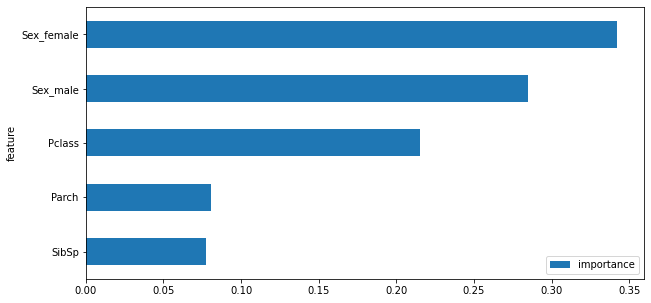

In [27]:
features = pd.DataFrame()
features['feature'] = X.columns
features['importance'] = model.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(10, 5))

In [18]:
preds_train = model.predict(X)
accuracy = accuracy_score(y, preds_train)
print(accuracy)

0.8159371492704826


In [21]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
